In [5]:
from enum import unique
from turtle import color
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import rotations
import seaborn as sns

In [6]:
sauc = pd.read_csv(r"C:\Users\RaefS\saudi-arabia-used-cars-dataset\saudi-arabia-used-cars-dataset\UsedCarsSA_Clean_EN.csv")
sauc.drop_duplicates(inplace=True)
sauc = sauc[sauc['Price'] != 0]
sauc = sauc[sauc['Price'] > 7000]

Text(0, 0.5, 'Cars')

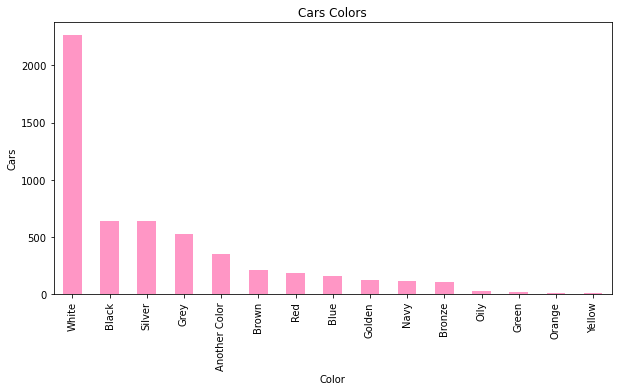

In [7]:
####First plot (Color bar chart)
fig = plt.figure(figsize=(10,5))
sauc.Color.value_counts().plot(kind='bar', rot=90, color='#FF96C5')
plt.title('Cars Colors')
plt.xlabel('Color')
plt.ylabel('Cars')
###Insight: White, black & silver are the most common colors whereas green, orange & yellow are the least frequent.

Text(0, 0.5, 'Cars')

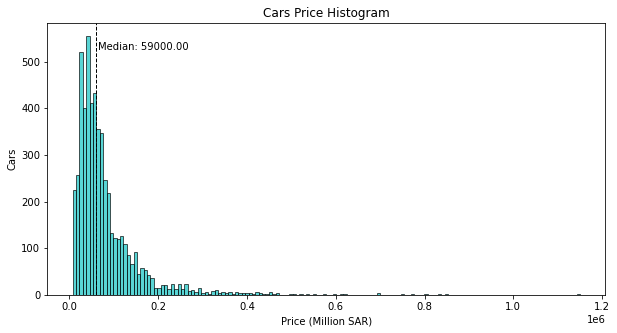

In [8]:
###Second plot (Price Histogram)
plt.figure(figsize=(10,5))
np.random.seed(6789)
x = sauc['Price']
result = plt.hist(x, bins=150, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x.median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(x.median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()))
plt.title('Cars Price Histogram')
plt.xlabel('Price (Million SAR)')
plt.ylabel('Cars')
#insight: price was positively skewed that's why we showed the median.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

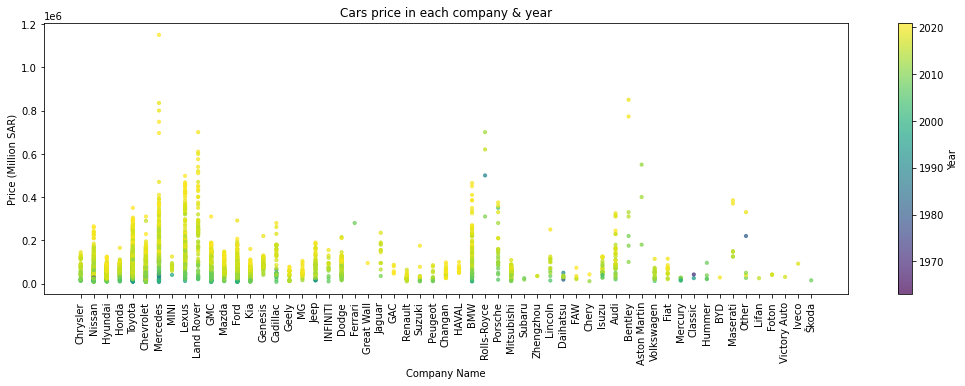

In [9]:
### Third plot (Company & Year Vs Price)
y = sauc['Price']
x = sauc['Make']
colors = sauc['Year']
plt.figure(figsize=(18,5))
plt.scatter(x,y, s=10, c=colors, alpha=0.7)
plt.colorbar(orientation="vertical", label="Year")
plt.title('Cars price in each company & year')
plt.xlabel('Company Name')
plt.ylabel('Price (Million SAR)')
plt.xticks(rotation=90)
###Insight: 
##This plot shows the price according to each company & year, Marcedes has the heighest price followed by Bentley & Rolls-Royce.
##not surprisingly, most price increase as the car's year increase (The newer the car, the heigher the price).

Text(0, 0.5, 'Cars')

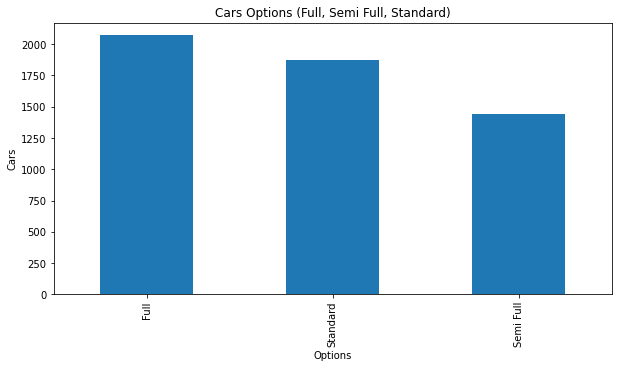

In [10]:
fig = plt.figure(figsize=(10,5))
sauc.Options.value_counts().plot(kind='bar', rot=90)
plt.title('Cars Options (Full, Semi Full, Standard)')
plt.xlabel('Options')
plt.ylabel('Cars')

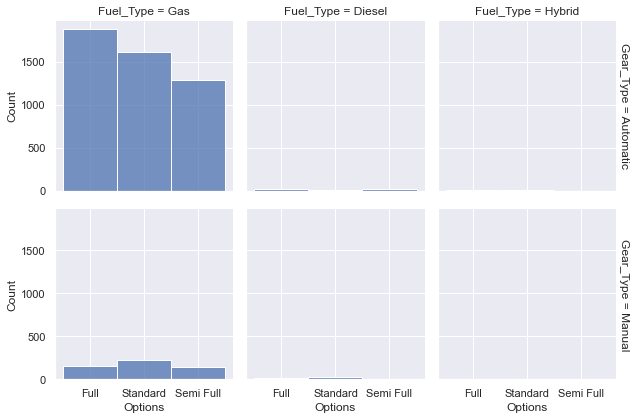

In [11]:
sns.set_theme(style="darkgrid")
sns.displot(
    sauc, x="Options", col="Fuel_Type",  row="Gear_Type",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

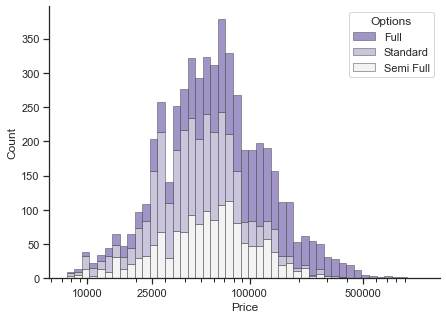

In [12]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    sauc,
    x="Price", hue="Options",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([10000, 25000, 100000, 500000])

In [13]:
cars_t = sauc.loc[(sauc['Make'] == 'Toyota') & (sauc['Year'] > 1999)]
cars_t

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000,False
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000,False
10,Toyota,Camry,2017,Gulf Arabic,White,Standard,2.5,Gas,Automatic,107000,Dammam,50000,False
15,Toyota,Corolla,2018,Saudi,White,Standard,1.6,Gas,Automatic,7702,Dammam,45000,False
20,Toyota,Prado,2021,Saudi,White,Semi Full,4.0,Gas,Automatic,3000,Dammam,174000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,Toyota,Rav4,2011,Saudi,Another Color,Semi Full,1.4,Gas,Manual,135000,Riyadh,25000,False
7988,Toyota,Avalon,2016,Saudi,White,Semi Full,3.5,Gas,Automatic,86000,Jeddah,87000,False
8010,Toyota,Furniture,2012,Saudi,Black,Semi Full,2.0,Gas,Automatic,202245,Riyadh,41000,False
8014,Toyota,Camry,2017,Saudi,Silver,Standard,2.5,Gas,Automatic,314000,Dammam,46000,False


<AxesSubplot:xlabel='Year', ylabel='Price'>

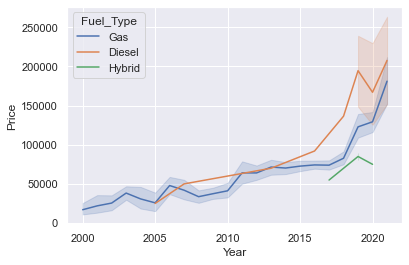

In [14]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="Year", y="Price",
             hue="Fuel_Type", 
             data=cars_t)

## Insights:
#### As an example, we took the sample of Toyota cars (as Toyota has the higher frequency) from 2000 onward. We see that Diesel used cars had lower prices in 2005, but with the time it got higher than Gas used cars. Moreover, note the behavior of the Hybrid used cars.

Text(0, 0.5, 'Count of Cars')

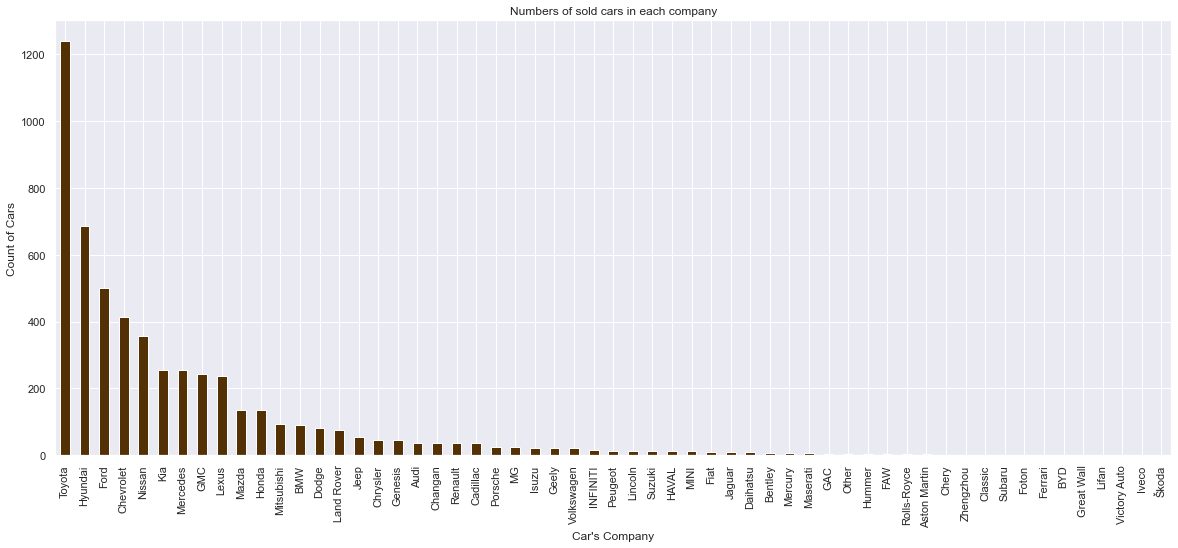

In [15]:
# Visualizing the different car company names available
plt.rcParams['figure.figsize'] = [20,8]
ax = sauc['Make'].value_counts().plot(kind='bar', colormap = 'BrBG')
ax.title.set_text('Numbers of sold cars in each company')
plt.xlabel("Car's Company")
plt.ylabel("Count of Cars")

<Figure size 1440x576 with 0 Axes>

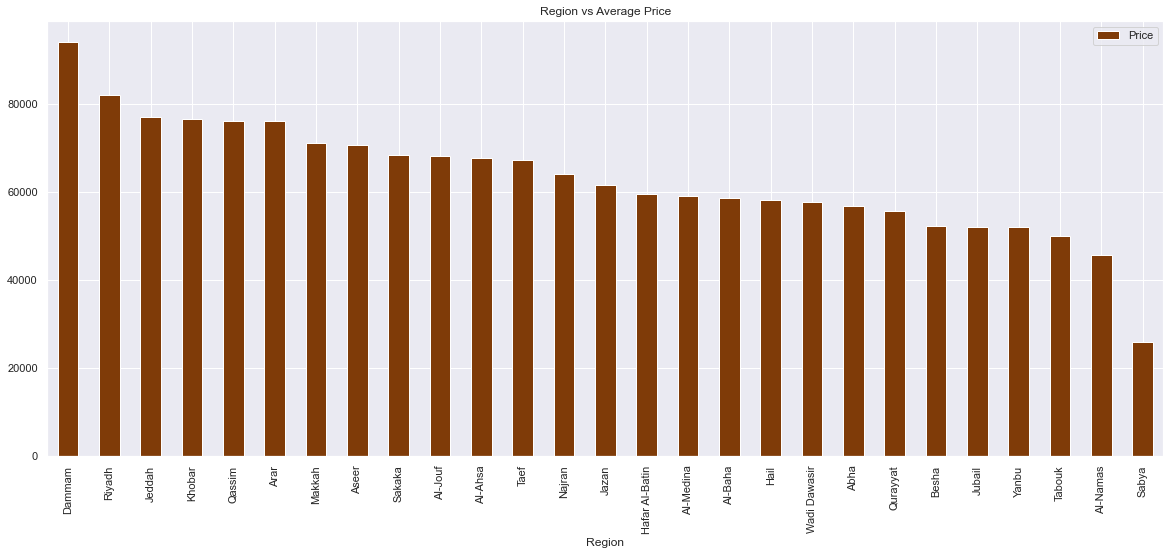

In [16]:
plt.figure(figsize=(20,8))

sauc = pd.DataFrame(sauc.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
sauc.plot.bar(colormap = 'PuOr')
plt.title('Region vs Average Price')
plt.show()

## Insights:
### Cities, from which the cars are mostly sold are Dammam, Riyadh, and Sakaka.